## Importing libraries

In [2]:
from sklearn.datasets import fetch_mldata 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Fetching MNIST data

In [3]:
mnist = fetch_mldata('MNIST original')
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

## Loading MNIST Data in X and y

In [10]:
X, y = mnist['data'], mnist['target']
shuffle_indices = np.random.permutation(70000)
X, y = X[shuffle_indices], y[shuffle_indices]  

## Training Random Forest Classifier on 80% of data

In [73]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=50,n_jobs=-1)
rnd_clf.fit(X[:50000],y[:50000])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Calculating accuracy of the model 

In [78]:
y_pred = rnd_clf.predict(X[50001:])
acc = accuracy_score(y_pred, y[50001:] )
print('accuracy = ' + str(acc))

accuracy = 0.888794439722


## Computing feature importance and plotting them

In [75]:
fea_imp = rnd_clf.feature_importances_

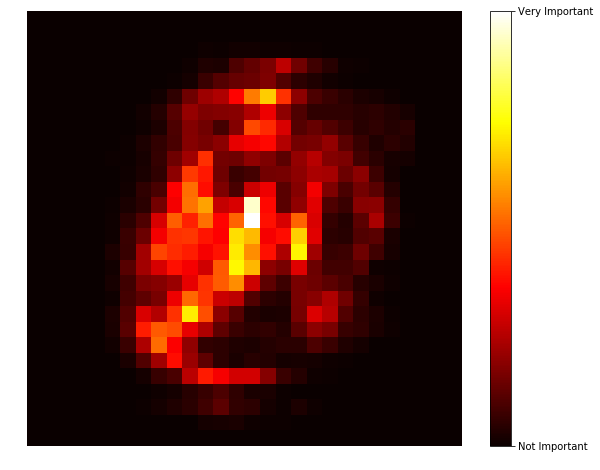

In [76]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(fea_imp.reshape(28, 28), cmap='hot')
plt.axis('off')
cbar = plt.colorbar(ticks=[fea_imp.min(), fea_imp.max()])
cbar.ax.set_yticklabels( ['Not Important', 'Very Important'])
plt.show()